# Sub-task 2: Dimensionality Reduction

## Part A: Code

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("kc_house_data.csv")
data = pd.read_csv("kc_house_data.csv")
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
data.head(), data.info()
# Just check that the data is imported without corruption.
print("|| Data: " + str(data.shape) + " ||")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
print(data['zipcode'].dtype)

int64


In [7]:
# Encode zipcode numerically using Target Encoding
data['zipcode_encoded'] = data.groupby('zipcode')['price'].transform('mean')
# Encode zipcode numerically using target encoding:
# Replace categorical `zipcode` with its mean `price` for each `zipcode`.
# This ensures the encoded `zipcode_encoded` captures its relationship with `price` 
# in a numerical format, making it suitable for correlation analysis and PCA: make PCA meaningful.

# Drop the original categorical zipcode and price column
data = data.drop(columns=['zipcode', 'price'])  # the focus is on the dimensionality reduction of the input features-ensure PCA only reflects patterns in the independent variables
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_encoded
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,310612.755725
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,469485.039024
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,462488.869258
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,551768.520913
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,685675.843537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,585048.779070
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,359496.260417
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,594706.542274
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,617053.966019


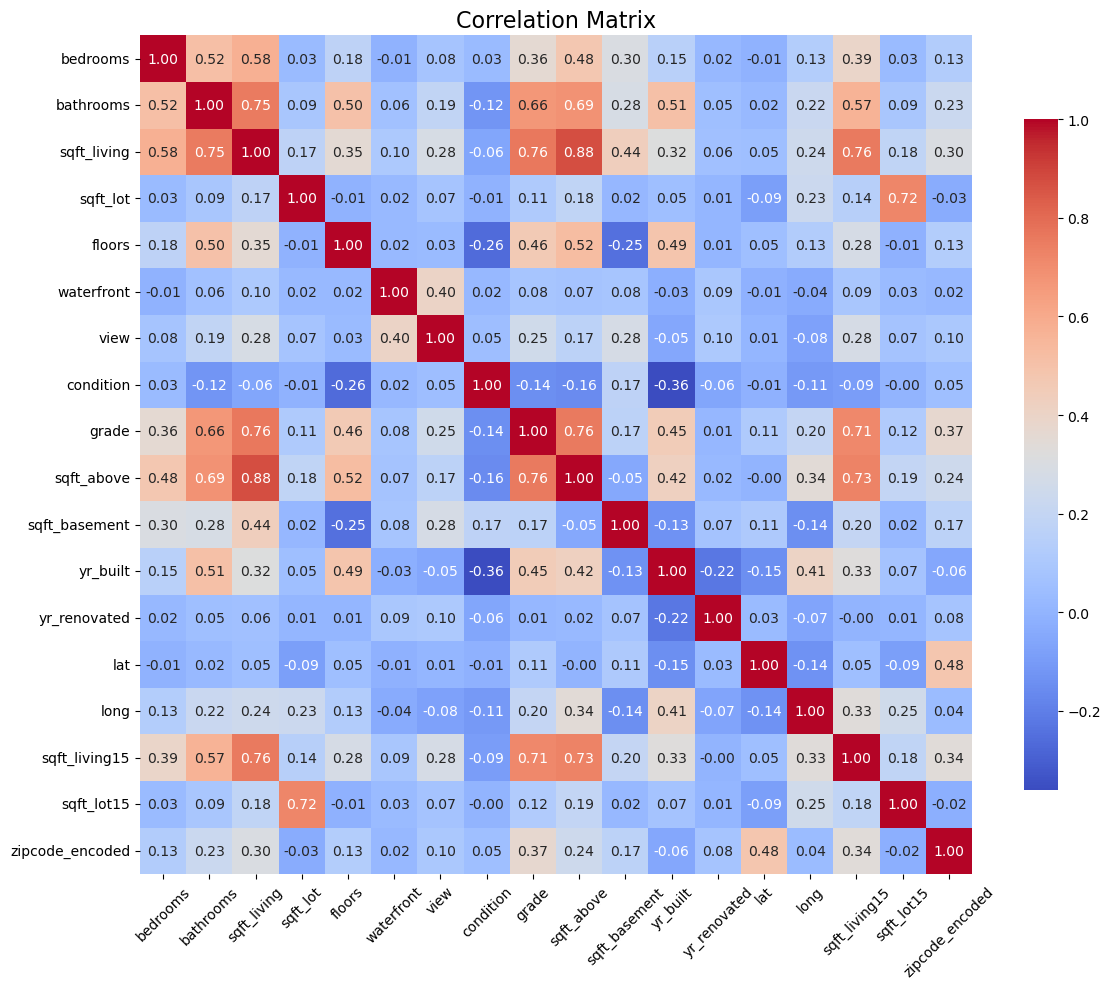

In [8]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix with improved readability
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Using PCA to reduce dimensionality of dataset to 3 dimensions/ features:

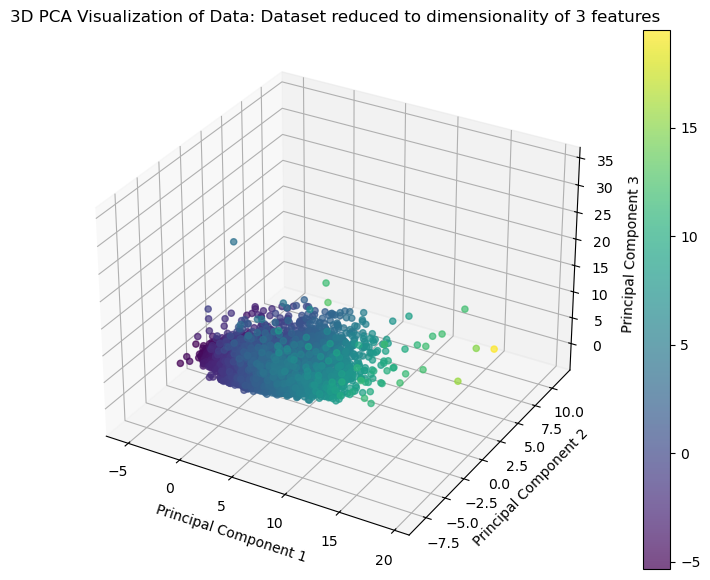

In [10]:
# Standardize the data
# Standardizing the data to ensure that the vectors/ variables are on the same scale--> variance=0
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca_3d = PCA(n_components=3)
reduced_data_3d = pca_3d.fit_transform(scaled_data)

# Visualize the PCA results in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    reduced_data_3d[:, 0],
    reduced_data_3d[:, 1],
    reduced_data_3d[:, 2],
    c=reduced_data_3d[:, 0],
    cmap='viridis',
    alpha=0.7,
)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization of Data: Dataset reduced to dimensionality of 3 features')
plt.colorbar(scatter)
plt.show()

### Analysis on the success of the dimensionality reduction (reducing dataset to 3 features):

#### Explained and Cumulative variance ratio of the first 3 Principle Components:

In [13]:
# Apply PCA to retain all components for variance analysis
pca_full = PCA()
pca_full.fit(scaled_data)

# Extract the explained variance ratio for the first 3 components
explained_variance_3d = pca_full.explained_variance_ratio_[:3]

# Compute the cumulative variance for the first 3 components
cumulative_variance_3d = np.cumsum(explained_variance_3d)

# Display the explained and cumulative variance ratios
print("Explained Variance Ratios for the First 3 Components:")
for i, var in enumerate(explained_variance_3d, start=1):
    print(f"PC{i}: {var:.4f}")

print("\nCumulative Variance Retained for the First 3 Components:")
for i, cum_var in enumerate(cumulative_variance_3d, start=1):
    print(f"Up to PC{i}: {cum_var:.4f}")


Explained Variance Ratios for the First 3 Components:
PC1: 0.2899
PC2: 0.1201
PC3: 0.1018

Cumulative Variance Retained for the First 3 Components:
Up to PC1: 0.2899
Up to PC2: 0.4100
Up to PC3: 0.5118


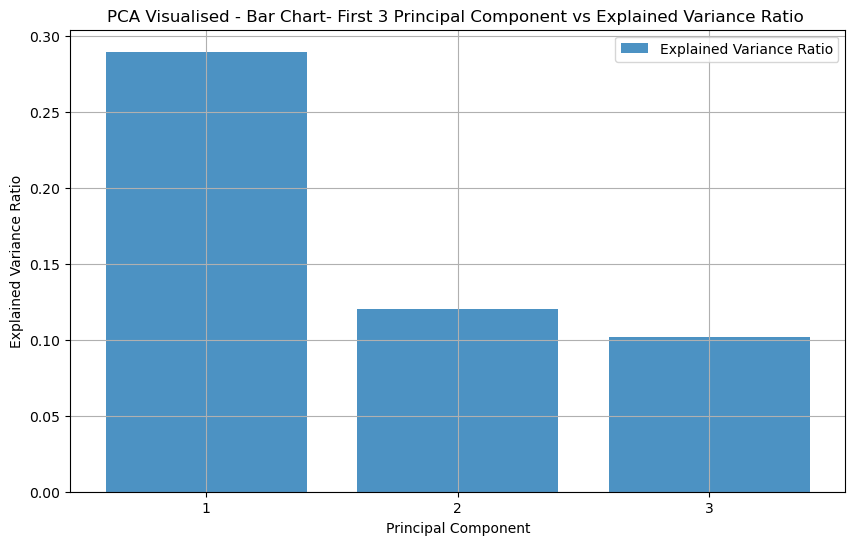

In [14]:
components = range(1, len(explained_variance_3d) + 1)

# Plotting the explained variance ratio as bars of Principal Component 1-3: 
#to show the variability and how well reducing the dataset to 3 dimensions
plt.figure(figsize=(10, 6))
plt.bar(components, explained_variance_3d, alpha=0.8, label='Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Visualised - Bar Chart- First 3 Principal Component vs Explained Variance Ratio ')
plt.xticks(components)
plt.legend()
plt.grid()
plt.show()

In [15]:
print("The cumulative variance of the first 3 principal components:",sum(explained_variance_3d) )
#The cumulative variance of 51.18% suggests that a significant amount of the dataset's variability is represented in the 3D projection. 
#Retaining 51.18% variance might be sufficient to observe general patterns or clusters however need to evaluate further the optimum feature reduction.
cumulative_variance_percentage = sum(explained_variance_3d) * 100
print(f"Cumulative variance explained by the first 3 components: {cumulative_variance_percentage:.2f}%")

The cumulative variance of the first 3 principal components: 0.5117794632201894
Cumulative variance explained by the first 3 components: 51.18%


### Appropriate minimum dimensionality to project the dataset to:

#### PCA Visualised Graph: Range of Principal Components vs Explained Variance Ratio: 

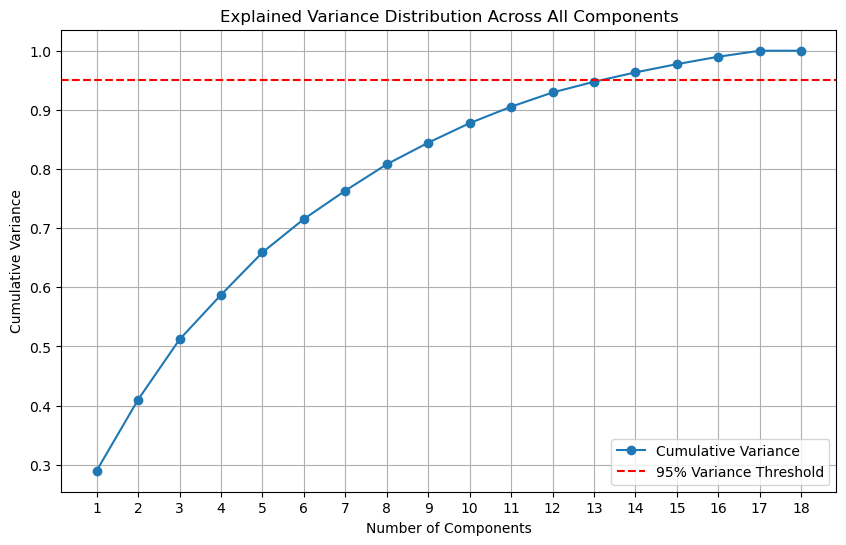

In [18]:
# Apply PCA to retain all components for variance analysis
pca_full = PCA()
pca_full.fit(scaled_data)

# Extract the explained variance ratio for the first 3 components
explained_variance_3d = pca_full.explained_variance_ratio_[:3]
explained_variance_ratio = pca_full.explained_variance_ratio_

# Compute the cumulative variance for the first 3 components
cumulative_variance_3d = np.cumsum(explained_variance_3d)

# Visualize the explained variance for all components
cumulative_variance_full = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance_full) + 1),
    cumulative_variance_full,
    marker='o',
    label='Cumulative Variance'
)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance Distribution Across All Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()


Original shape: (21613, 19) Original (remove 'price' feature) shape: (21613, 18) Reduced shape (95% variance): (21613, 14)
Minimum principal components for 95% variance retention: 14
Cumulative variance retained with 95%: 0.9633565936632217


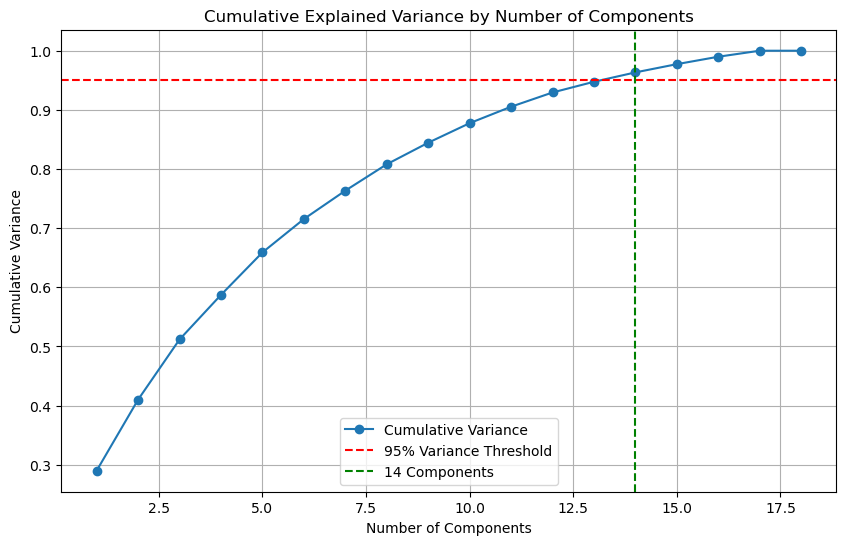

In [19]:
numerical_data = data.select_dtypes(include=[np.number])#Select only numerical features for PCA
X = numerical_data.values  # Feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_full = PCA()
pca_full.fit(X_scaled)

# Retain 95% of the variance
pca_95 = PCA(0.95)  # Automatically selects components for 95% variance
X_proj_95 = pca_95.fit_transform(X_scaled)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determine the minimum number of components for 95% variance retention
min_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Output results
print("Original shape:", df.shape, "Original (remove 'price' feature) shape:", X_scaled.shape, "Reduced shape (95% variance):", X_proj_95.shape)
print("Minimum principal components for 95% variance retention:", min_components_95)
print("Cumulative variance retained with 95%:", cumulative_variance[min_components_95 - 1])

# Optional: Visualize cumulative variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    label='Cumulative Variance'
)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=min_components_95, color='g', linestyle='--', label=f'{min_components_95} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.legend()
plt.grid()
plt.show()

In [20]:
# Display minimum dimensionality
min_components_95

14

#### Compare Variance Retention: Reduced dimensionality of dataset to 3 vs 14 features: 

Variance retained with 3 components: 0.51
Variance retained with 14 components: 0.96


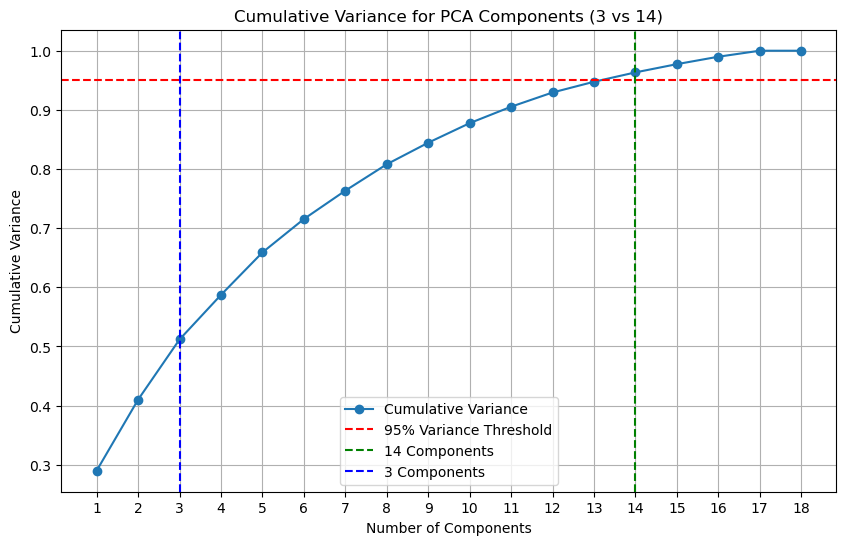

In [22]:
# Compare Variance Retention for 3 and 14 components
pca_3 = PCA(n_components=3)
pca_14 = PCA(n_components=14)

pca_3.fit(X_scaled)
pca_14.fit(X_scaled)

variance_3 = sum(pca_3.explained_variance_ratio_)
variance_14 = sum(pca_14.explained_variance_ratio_)

# Output variance retention for 3 and 14 components
print(f"Variance retained with 3 components: {variance_3:.2f}")
print(f"Variance retained with 14 components: {variance_14:.2f}")

# Plot cumulative variance with markers for 3 and 14 components
pca_full = PCA()
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=14, color='g', linestyle='--', label='14 Components')
plt.axvline(x=3, color='b', linestyle='--', label='3 Components')
plt.xticks(range(1, len(cumulative_variance) + 1, 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance for PCA Components (3 vs 14)')
plt.legend()
plt.grid()
plt.show()

#### Evaluate Reconstruction Error (Data Reconstruction with PCA — NannyML 0.3.1 Documentation):

In [24]:
# Evaluate Reconstruction Error for 3 and 14 components:

# Apply PCA for 14 components
pca_14 = PCA(n_components=14)
pca_14.fit(X_scaled)

# Reduce and reconstruct with 3 components
X_3_reduced = pca_3.transform(X_scaled)
X_3_reconstructed = pca_3.inverse_transform(X_3_reduced)

# Reduce and reconstruct with 14 components
X_14_reduced = pca_14.transform(X_scaled)
X_14_reconstructed = pca_14.inverse_transform(X_14_reduced)

# Compute reconstruction errors
error_3 = mean_squared_error(X_scaled, X_3_reconstructed)
error_14 = mean_squared_error(X_scaled, X_14_reconstructed)

# Print reconstruction errors
print(f"Reconstruction error with 3 components: {error_3:.4f}")
print(f"Reconstruction error with 14 components: {error_14:.4f}")

#Reconstruction Errors:
#Measures the difference between the original and reconstructed data for 3 and 14 components:
#A lower error indicates better retention of the dataset's structure.



Reconstruction error with 3 components: 0.4882
Reconstruction error with 14 components: 0.0366


#### Data Compression Ratio for Dimensionality of 3 and 14:

In [26]:
# Calculate Compression Metrics for 3 and 14 Components
original_dimensions = X_scaled.shape[1]  # Total number of original features
reduced_dimensions_3 = 3  # Reduced dimensions for 3 components
reduced_dimensions_14 = 14  # Reduced dimensions for 14 components

# Compression Ratio and Percentage for 3 Components
compression_ratio_3 = reduced_dimensions_3 / original_dimensions
compression_percentage_3 = (1 - compression_ratio_3) * 100

# Compression Ratio and Percentage for 14 Components
compression_ratio_14 = reduced_dimensions_14 / original_dimensions
compression_percentage_14 = (1 - compression_ratio_14) * 100

# Output Compression Metrics
print(f"Compression Ratio with 3 components: {compression_ratio_3:.2f}")
print(f"Compression Percentage with 3 components: {compression_percentage_3:.2f}%")
print(f"Compression Ratio with 14 components: {compression_ratio_14:.2f}")
print(f"Compression Percentage with 14 components: {compression_percentage_14:.2f}%")


Compression Ratio with 3 components: 0.17
Compression Percentage with 3 components: 83.33%
Compression Ratio with 14 components: 0.78
Compression Percentage with 14 components: 22.22%


#### Evaluate Variance Retention vs Compression:

In [28]:
# Link to variance retention
print("\nVariance Retention vs Compression:")
print(f"3 components: Retains 52.82% variance with a compression of {compression_percentage_3:.2f}%.")
print(f"13 components: Retains 95% variance with a compression of {compression_percentage_14:.2f}%.")


Variance Retention vs Compression:
3 components: Retains 52.82% variance with a compression of 83.33%.
13 components: Retains 95% variance with a compression of 22.22%.


## Part B: Written Justification (255 Words)

Principal Component Analysis (PCA) was implemented as the dimensionality reduction method as it's particularly suited to this dataset due to it predominantly containing numerical features with meaningful variance (shown through the correlation matrix). This made PCA ideal for identifying patterns, reducing redundancy, and simplifying the data while retaining as much information as possible(Jaadi). 

The categorical 'zipcode' feature was encoded using Target-Encoding to preserve its relationship with the target variable,'price' while ensuring compatibility with PCA(IBM SPSS Statistics 30.0.0). Additionally,the target variable,'price', was excluded to focus exclusively on dimensionality reduction for the input features. PCA was applied to project the dataset into three dimensions,but analysis revealed that this 3D projection captured only 51% of the total variance(i.e. cumulative variance),resulting in significant information loss and high reconstruction errors. Compression metrics supported this finding, with a compression ratio of 0.17 and an 83.33% reduction in dimensionality, highlighting significant simplification but insufficient information retention.

To address this, a cumulative variance analysis identified that an appropriate minimum of 14 principal components was required to retain at least 95% of the variance, ensuring that the dataset's complexity was preserved. The reconstruction error with 14 components was significantly lower (0.0366 vs 0.4882),confirming its ability to maintain the dataset's structure. Compression metrics for 14 components further reinforced this conclusion, with a compression ratio of 0.78 and a 22.22% reduction in dimensionality, striking a balance between simplifying the dataset and retaining critical information. This evaluation demonstrated, that while the 3D projection is useful for visualization, the 14-component projection is essential for preserving the dataset's complexity.

### References:

“Data Reconstruction with PCA — NannyML 0.3.1 Documentation.” Readthedocs.io, 2022, nannyml.readthedocs.io/en/v0.4.0/how_it_works/data_reconstruction.html. 

IBM SPSS Statistics 30.0.0. Ibm.com, 15 Jan. 2025, www.ibm.com/docs/en/spss-statistics/30.0.0?topic=edition-categorical-principal-components-analysis. 

Jaadi, Zakaria. “A Step by Step Explanation of Principal Component Analysis.” Built In, 23 Feb. 2024, builtin.com/data-science/step-step-explanation-principal-component-analysis